In [196]:
# Basic
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns

# Common Tools
from sklearn.preprocessing import LabelEncoder
from collections import Counter

#Algorithms
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
#from sklearn.ensemble import VotingClassifier

#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('C:\\Users\\toyot\\Desktop\\python\\titanic\\train.csv')
df_test = pd.read_csv('C:\\Users\\toyot\\Desktop\\python\\titanic\\test.csv')
#pprint.pprint(df_train)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
profile = pdp.ProfileReport(df)
profile.to_file(outputfile='C:\\Users\\toyot\\Desktop\\python\\titanic\myoutputfile.html')

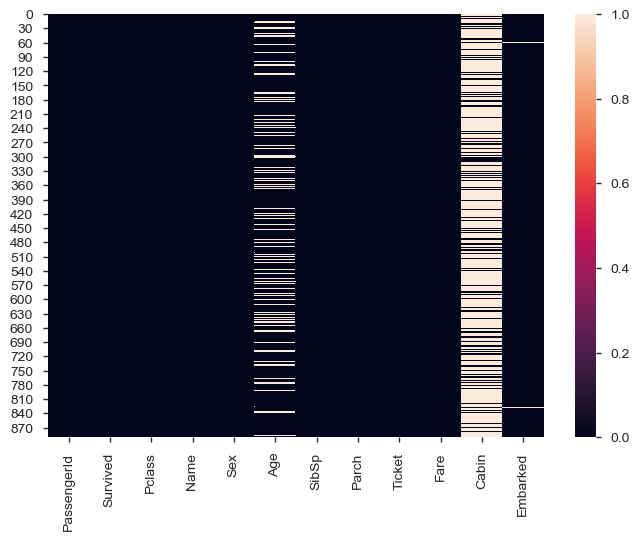

In [143]:
sns.heatmap(df_train.isnull())

In [144]:
def kesson_table(df):
    null_count = df.isnull().sum()
    loss_ratio = 100 * null_count/len(df)
    data = pd.concat([null_count, loss_ratio], axis=1)
    return data
kesson_table(df_train)

,0,1
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


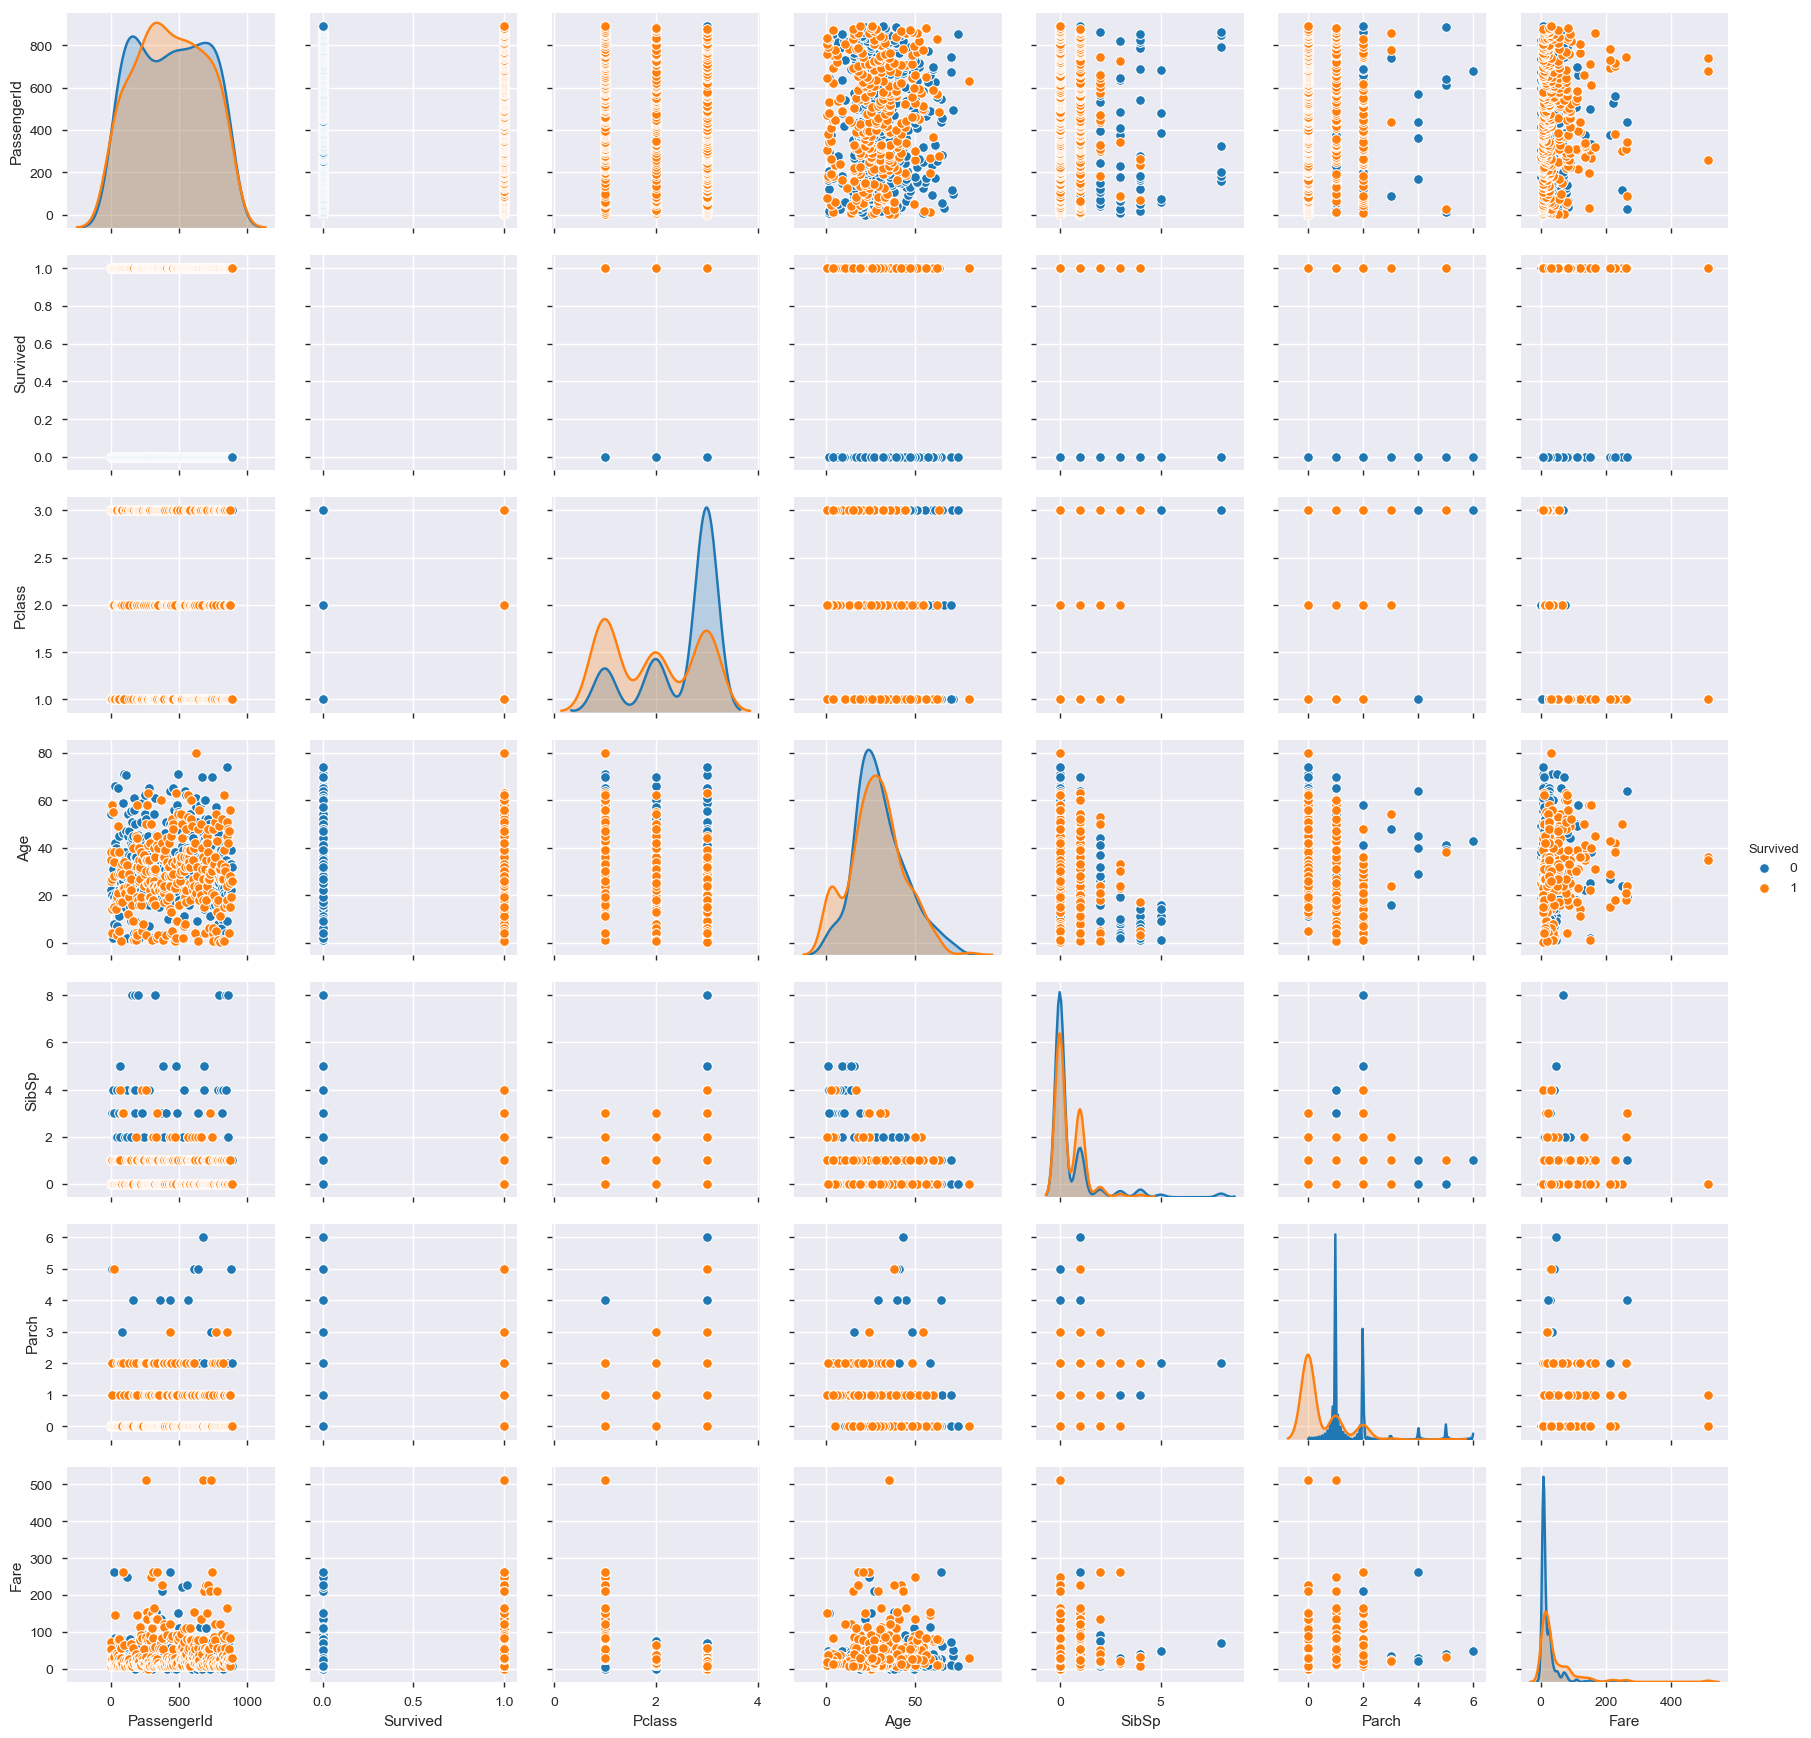

In [145]:
sns.pairplot(df_train, hue='Survived')

## Survivedの確認

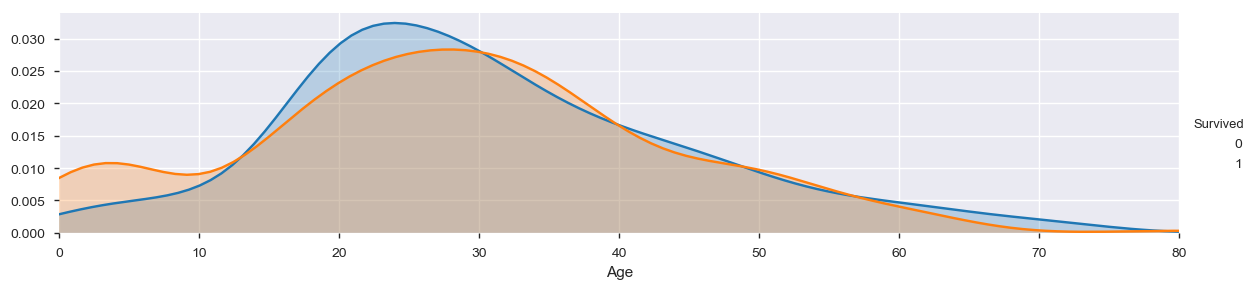

In [146]:
a = sns.FacetGrid(df_train, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age',
      shade=True)
a.set(xlim=(0, df_train['Age'].max()))
a.add_legend({0:'dead', 1:'survive'})

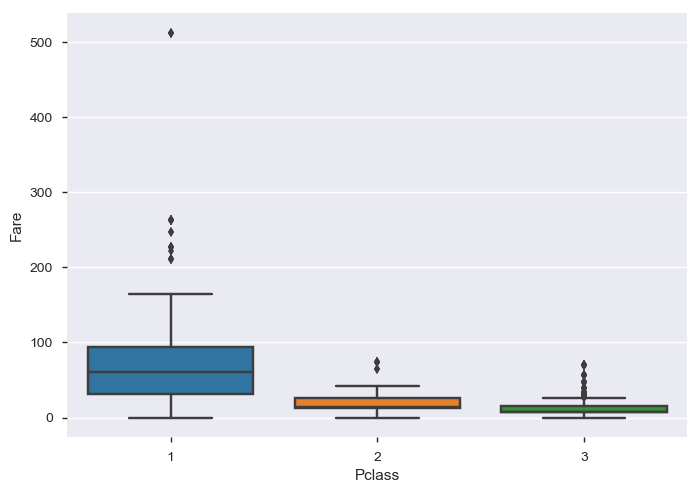

In [147]:
sns.boxplot(x='Pclass', y='Fare', data=df_train)

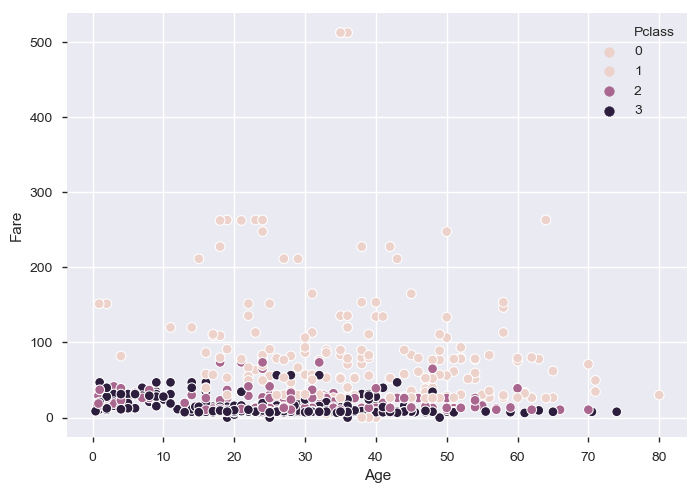

In [148]:
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df_train)

In [149]:
df_train.groupby(['Parch'])['Survived'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [150]:
df_train.groupby(['SibSp'])['Survived'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

## Data Wrangling

In [153]:
q = df_train['Fare'].quantile(0.99)
q

249.00622000000033

In [154]:
df_train = df_train[df_train['Fare'] < q]
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               247.521
dtype: object

In [155]:
Id = df_test['PassengerId']
Id.shape

(418,)

In [156]:
split = len(df_train)
split

882

In [157]:
data = pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

In [158]:
data.drop('PassengerId', axis=1, inplace=True)

In [159]:
data.shape

(1300, 11)

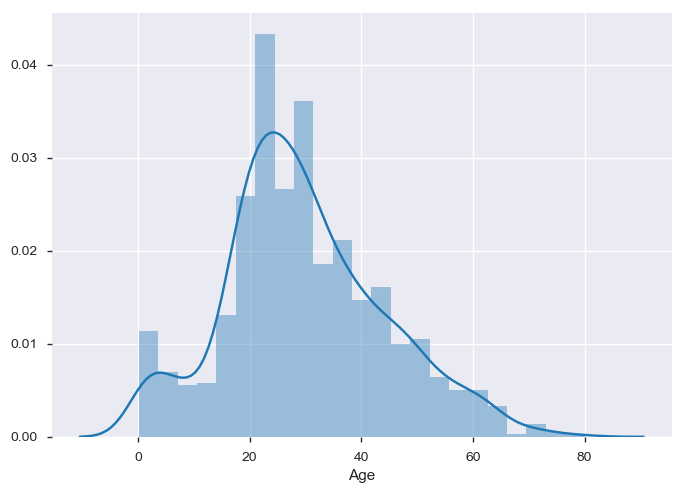

In [160]:
sns.distplot(data['Age'].dropna())

In [161]:
median = data['Age'].median()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size=is_null)
age_slice = data['Age']
age_slice[np.isnan(age_slice)] = rand_age
data['Age'] = age_slice
data['Age'] = data['Age'].astype(int)
data['Age'].isnull().sum()

0

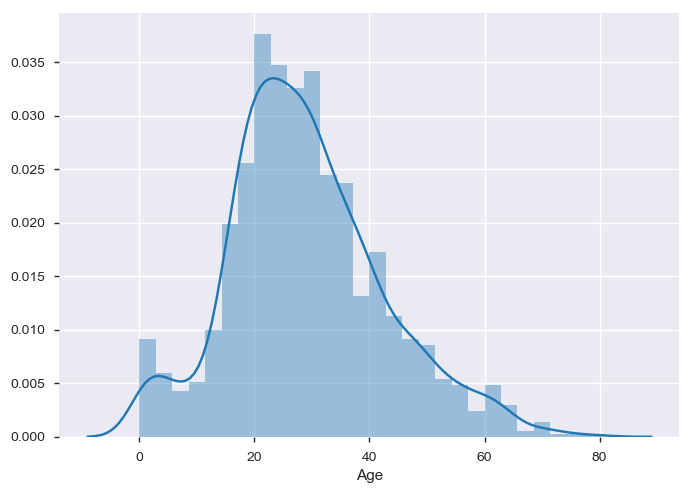

In [162]:
sns.distplot(data['Age'])

In [171]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)#[0]がないと
data.Embarked.isnull().sum()

0

In [172]:
data.isnull().sum()

Age            0
Cabin       1013
Embarked       0
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [175]:
data.Fare.fillna(data.Fare.mean(),inplace=True)
data.Fare.isnull().sum()

0

In [181]:
le = LabelEncoder()

In [186]:
data['CabinBool'] = data['Cabin'].notnull().astype('int')
#data.CabinBool

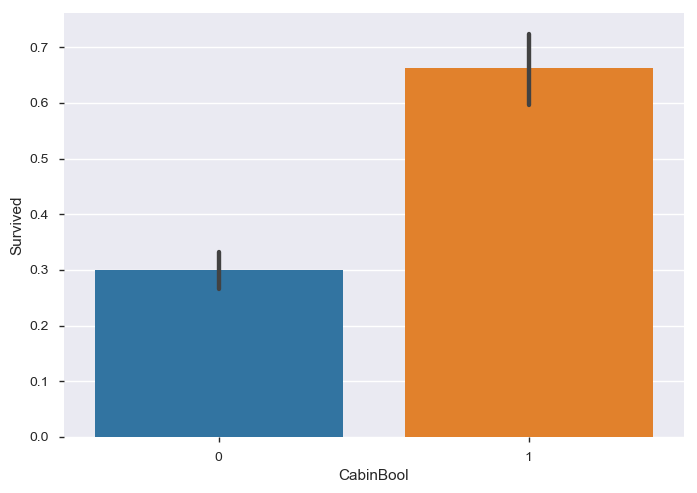

In [191]:
sns.barplot(x='CabinBool', y='Survived' ,data=data)

In [208]:
data['Deck'] = data.Cabin.str.extract('([a-zA-Z]+)',expand=False)
data[['Cabin', 'Deck']].sample(10)#非復元抽出
data['Deck'] = data['Deck'].fillna('Z')
data = data.drop(['Cabin'],axis=1)

data['Deck'] = le.fit_transform(data['Deck'])
#data['Deck']

AttributeError: 'DataFrame' object has no attribute 'Cabin'

In [210]:
data.Deck.isnull().sum()

0

In [5]:
data['Familysize'] = data['SibSp'] + data['Parch']

NameError: name 'data' is not defined